In [1]:
import pandas as pd
deliveries_df = pd.read_csv("innings_deliveries.csv")
print(deliveries_df.head())
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns
sns.set_style("whitegrid")


                          team  over        batter    bowler   non_striker  \
0  Royal Challengers Bengaluru     0       V Kohli  I Sharma  F du Plessis   
1  Royal Challengers Bengaluru     0       V Kohli  I Sharma  F du Plessis   
2  Royal Challengers Bengaluru     0  F du Plessis  I Sharma       V Kohli   
3  Royal Challengers Bengaluru     0       V Kohli  I Sharma  F du Plessis   
4  Royal Challengers Bengaluru     0       V Kohli  I Sharma  F du Plessis   

   runs_batter  runs_extras  runs_total player_out wicket_kind fielders  
0            0            0           0        NaN         NaN       []  
1            1            0           1        NaN         NaN       []  
2            1            0           1        NaN         NaN       []  
3            0            0           0        NaN         NaN       []  
4            2            0           2        NaN         NaN       []  


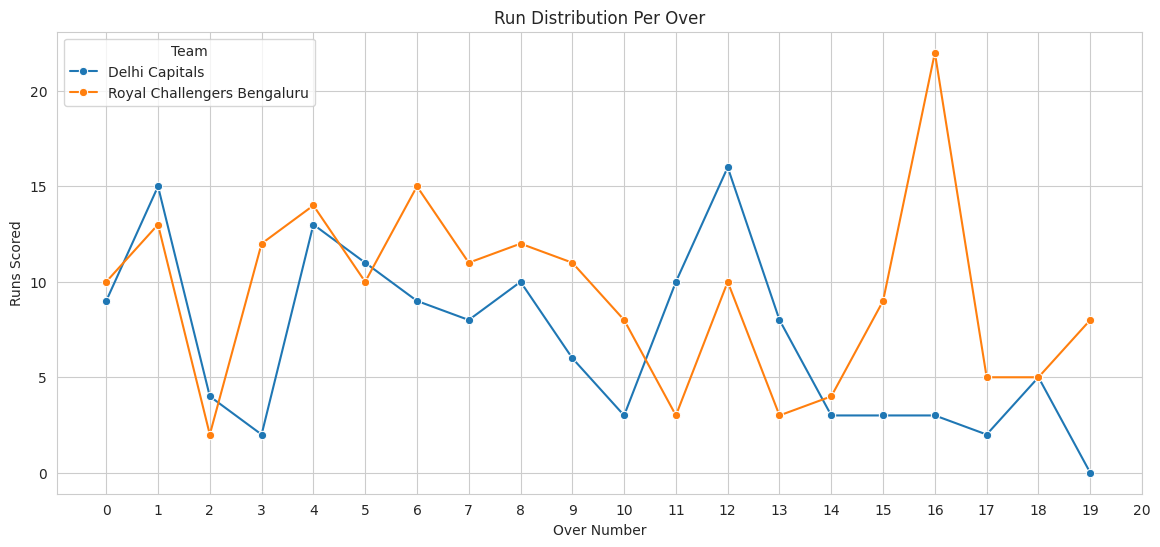

In [2]:
#visualizing the run distribution per over for both teams
run_distribution = deliveries_df.groupby(['team', 'over']).agg({'runs_total': 'sum'}).reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(data=run_distribution, x='over', y='runs_total', hue='team', marker='o')
plt.title('Run Distribution Per Over')
plt.xlabel('Over Number')
plt.ylabel('Runs Scored')
plt.xticks(range(0, 21))  # over numbers from 0 to 20
plt.legend(title='Team')
plt.show()

In [3]:
#The scoring rate for each team shows fluctuations throughout their innings, with spikes indicating overs with high scoring, likely due to boundaries or big hits.
#Royal Challengers Bangalore (RCB) appears to have a couple of overs with significantly higher runs, suggesting aggressive batting.

                           team           batter  runs_batter
0                Delhi Capitals         AR Patel           57
16  Royal Challengers Bengaluru       RM Patidar           52
19  Royal Challengers Bengaluru         WG Jacks           41
11  Royal Challengers Bengaluru          C Green           32
9                Delhi Capitals          SD Hope           29
18  Royal Challengers Bengaluru          V Kohli           27
4                Delhi Capitals  J Fraser-McGurk           21
15  Royal Challengers Bengaluru        MK Lomror           13
8                Delhi Capitals     Rasikh Salam           10
12  Royal Challengers Bengaluru     F du Plessis            6
5                Delhi Capitals    Kuldeep Yadav            6
14  Royal Challengers Bengaluru        KV Sharma            6
10               Delhi Capitals         T Stubbs            3
7                Delhi Capitals     Mukesh Kumar            3
1                Delhi Capitals    Abishek Porel            2
6       

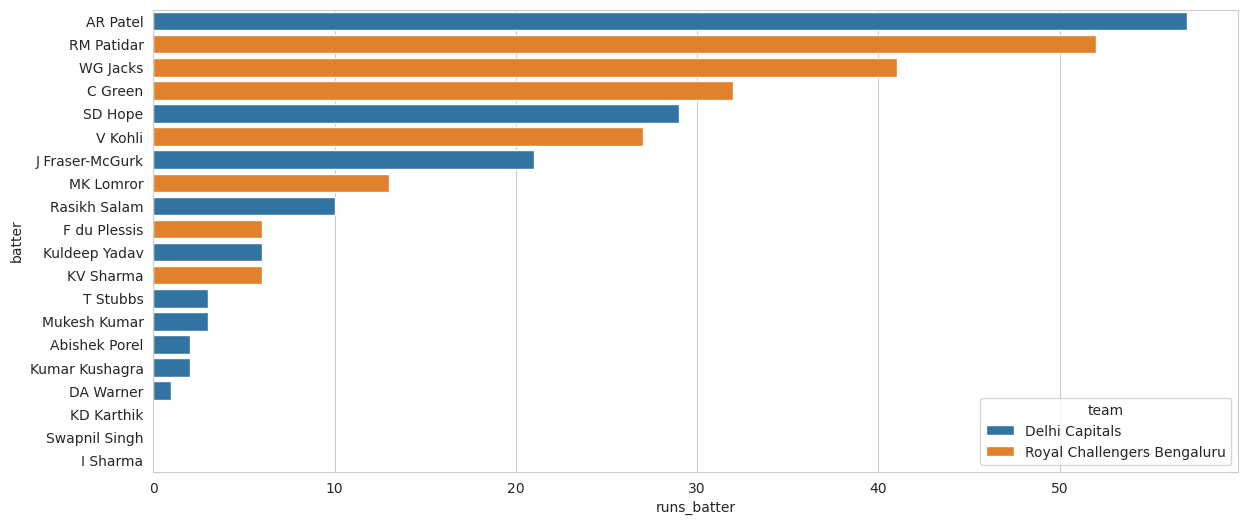

In [4]:
#calculating top scorers for each team

top_scorer = deliveries_df.groupby(['team', 'batter']).agg({'runs_batter':'sum'}).reset_index().sort_values(by ='runs_batter', ascending=False)
print(top_scorer)
plt.figure(figsize=(14, 6))
sns.barplot(data = top_scorer, x = 'runs_batter', y = 'batter', hue ='team')
plt.title('Top scorers')
plt.xlabel('Over')
plt.ylabel('Run Rate')
plt.show()

                           team          bowler  runs_total  wickets_taken  \
6                Delhi Capitals      Yash Dayal          20              4   
11  Royal Challengers Bengaluru    Mukesh Kumar          24              3   
0                Delhi Capitals         C Green          19              2   
2                Delhi Capitals     LH Ferguson          24              2   
9   Royal Challengers Bengaluru        KK Ahmed          32              2   
12  Royal Challengers Bengaluru    Rasikh Salam          23              2   
3                Delhi Capitals  Mohammed Siraj          33              1   
4                Delhi Capitals   Swapnil Singh           9              1   
8   Royal Challengers Bengaluru        I Sharma          31              1   
10  Royal Challengers Bengaluru   Kuldeep Yadav          53              1   
1                Delhi Capitals       KV Sharma          19              0   
5                Delhi Capitals        WG Jacks          16     

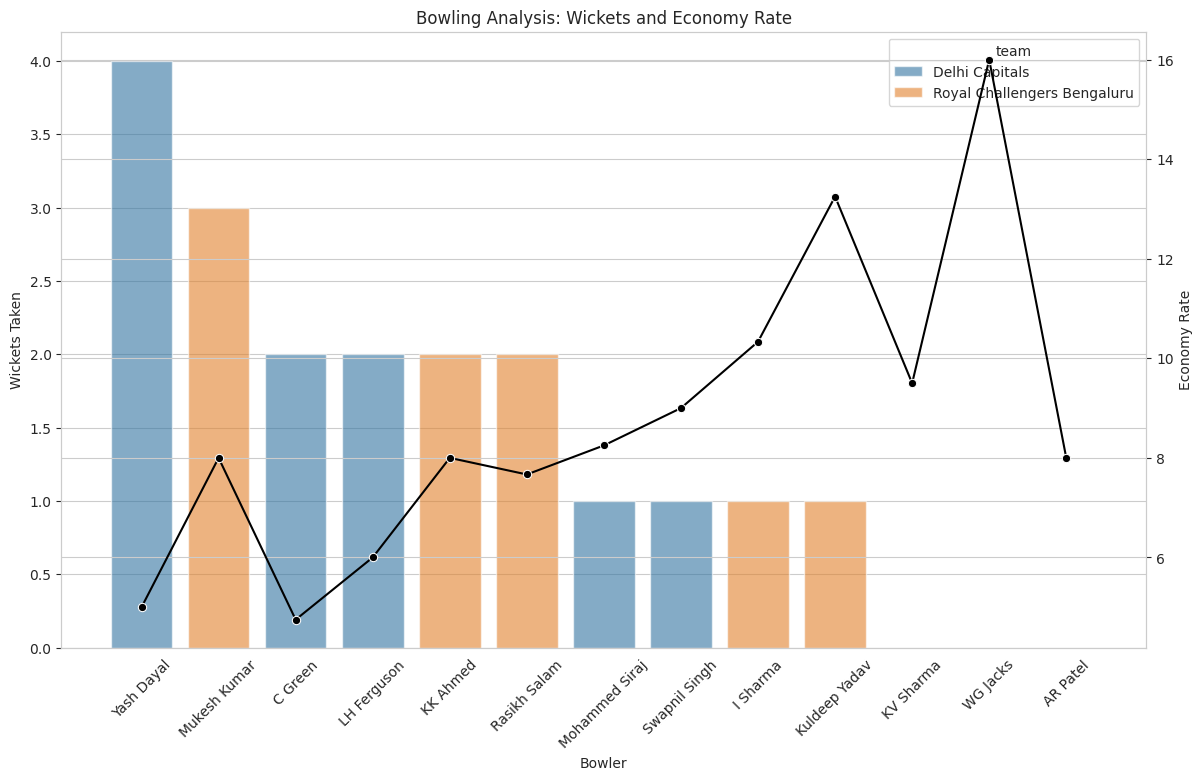

In [5]:
#bowling analysis
deliveries_df['wickets_taken'] = deliveries_df['wicket_kind'].notna().astype(int)
bowling_stats = deliveries_df.groupby(['team', 'bowler']).agg({'runs_total': 'sum', 'wickets_taken': 'sum', 'over': 'nunique'}).reset_index().sort_values(by ='wickets_taken',ascending=False )
print(bowling_stats)
# calculating economy rate (total runs conceded / number of overs bowled)
bowling_stats['economy_rate'] = bowling_stats['runs_total'] / bowling_stats['over']
print(bowling_stats['economy_rate'])
fig, ax1 = plt.subplots(figsize=(14, 8))
sns.barplot(data=bowling_stats, x='bowler', y='wickets_taken', hue='team',ax=ax1, alpha=0.6)
ax1.set_ylabel('Wickets Taken')
ax1.set_xlabel('Bowler')
for item in ax1.get_xticklabels():
    item.set_rotation(45)
ax1.set_title('Bowling Analysis: Wickets and Economy Rate')
ax2 = ax1.twinx()
sns.lineplot(data=bowling_stats, x='bowler', y='economy_rate', marker='o', sort=False, ax=ax2, color='black')
ax2.set_ylabel('Economy Rate')
plt.show()

caught     13
run out     4
lbw         1
bowled      1
Name: wicket_kind, dtype: int64


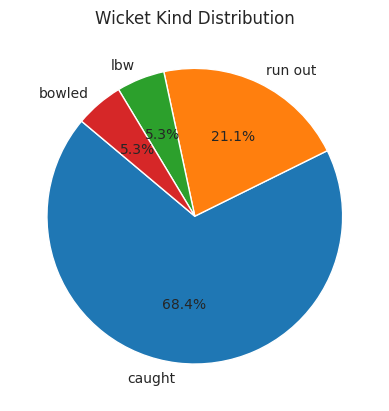

In [6]:
# counting dismissal types
dismissal_type = deliveries_df['wicket_kind'].value_counts()
print(dismissal_type)
plt.pie(dismissal_type, labels=dismissal_type.index, autopct='%1.1f%%', startangle=140)
plt.title('Wicket Kind Distribution')
plt.show()


0        Powerplay
1        Powerplay
2        Powerplay
3        Powerplay
4        Powerplay
          ...     
242    Death overs
243    Death overs
244    Death overs
245    Death overs
246    Death overs
Name: Phase, Length: 247, dtype: object


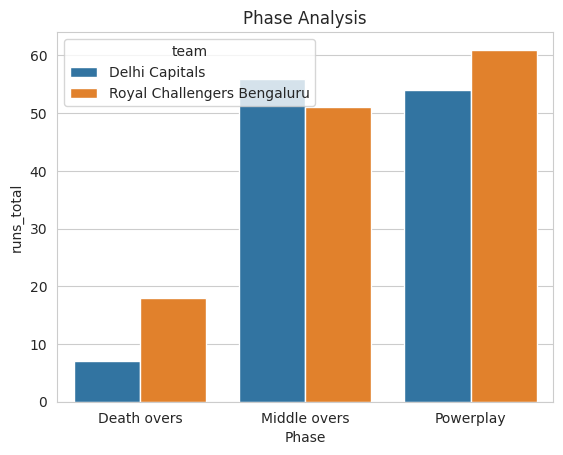

In [7]:
#Phase Analysis to examine how teams
#Powerplay (first 6 overs), Middle overs (7-15), and Death overs (16-20)
def phase_analysis(over):
    if over < 6:
        return 'Powerplay'
    elif 7 < over < 15:
        return 'Middle overs'
    elif 16 < over < 20:
        return 'Death overs'
   
# Assuming deliveries_df is your DataFrame and 'over' is a column in it
deliveries_df['Phase'] = deliveries_df['over'].apply(phase_analysis)
totalruns= deliveries_df.groupby(['team', 'Phase']).agg({'runs_total':'sum'}).reset_index()
print(deliveries_df['Phase'])
sns.barplot(data = totalruns, x ='Phase', y = 'runs_total', hue ='team')
plt.title('Phase Analysis')
plt.show()

In [34]:
#calculating the strike rate

batter_stats = deliveries_df.groupby(['team','batter']).agg({'runs_batter': 'sum', 'over': 'count'}).rename(columns={'over': 'balls_faced'}).reset_index()
batter_stats['Strike_rate']= (batter_stats['runs_batter']/batter_stats['balls_faced'])
batter_stats_sorted = batter_stats.sort_values(by='Strike_rate', ascending=False)
print (batter_stats_sorted)

                           team           batter  runs_batter  balls_faced  \
4                Delhi Capitals  J Fraser-McGurk           21            8   
18  Royal Challengers Bengaluru          V Kohli           27           14   
16  Royal Challengers Bengaluru       RM Patidar           52           34   
14  Royal Challengers Bengaluru        KV Sharma            6            4   
0                Delhi Capitals         AR Patel           57           40   
19  Royal Challengers Bengaluru         WG Jacks           41           30   
11  Royal Challengers Bengaluru          C Green           32           24   
15  Royal Challengers Bengaluru        MK Lomror           13           10   
9                Delhi Capitals          SD Hope           29           24   
12  Royal Challengers Bengaluru     F du Plessis            6            7   
8                Delhi Capitals     Rasikh Salam           10           12   
10               Delhi Capitals         T Stubbs            3   

                           team  over  runs_batter  run_rate
0                Delhi Capitals     0            9  1.500000
1                Delhi Capitals     1           15  2.500000
2                Delhi Capitals     2            4  0.666667
3                Delhi Capitals     3            2  0.333333
4                Delhi Capitals     4           13  2.166667
5                Delhi Capitals     5           11  1.833333
6                Delhi Capitals     6            9  1.500000
7                Delhi Capitals     7            7  1.166667
8                Delhi Capitals     8            9  1.500000
9                Delhi Capitals     9            6  1.000000
10               Delhi Capitals    10            3  0.500000
11               Delhi Capitals    11           10  1.666667
12               Delhi Capitals    12           16  2.666667
13               Delhi Capitals    13            8  1.333333
14               Delhi Capitals    14            3  0.500000
15               Delhi C

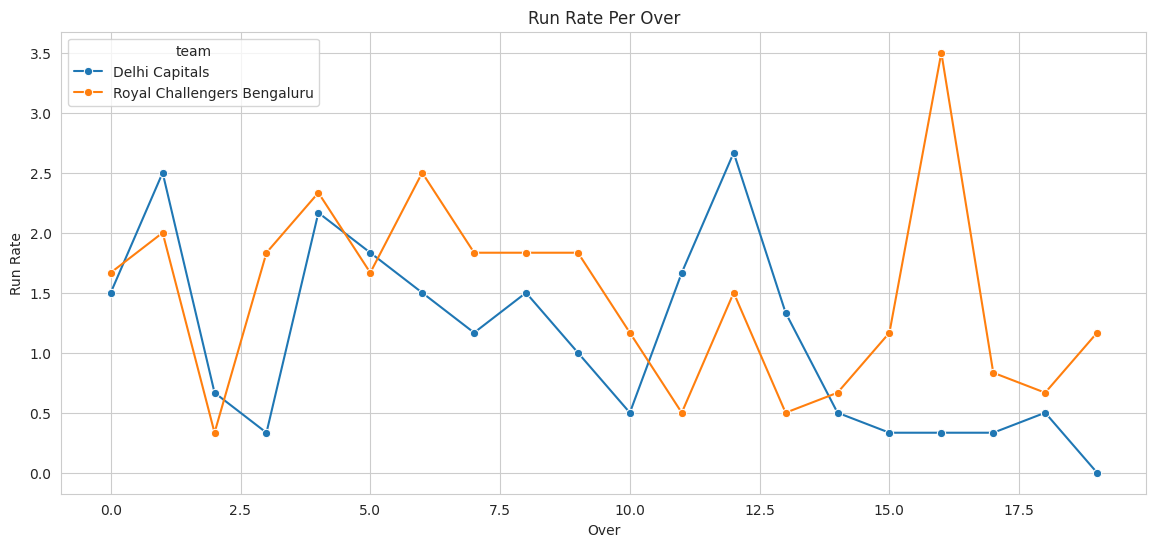

In [49]:
#run rate for each over for both teams 
runrate_data = deliveries_df.groupby(['team', 'over']).agg({'runs_batter':'sum'}).reset_index()
runrate_data['run_rate'] = runrate_data['runs_batter']/6
print (runrate_data)
plt.figure(figsize=(14, 6))
sns.lineplot(data = runrate_data, x ='over', y ='run_rate' , hue ='team', marker='o')
plt.title('Run Rate Per Over')
plt.xlabel('Over')
plt.ylabel('Run Rate')
plt.show()